<div style="text-align: right; font-size: large; width: 100%" >
    <b>
        Ibrahim MOHAMED SEROUIS, <br>
        2020-2021
    </b>
<div>
<div>
    <center><h1>Data Mining lab : Project </h1></center>
</div>

<h1> Libraries </h1>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import train_test_split

<h1> Dataset import </h1>

In [2]:
dataset = pd.read_csv("iris_data.csv", header=None, names=["sepal length","sepal width","petal length","petal width","class"])
dataset.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1> Data cleaning </h1>

<h2> Checking for blank values </h2>

<h3> Sepal length </h3>

In [3]:
null_sl = dataset["sepal length"].isnull().sum()
print("Number of missing sepal lengths: ", null_sl)

Number of missing sepal lengths:  3


<h3> Sepal width </h3>

In [4]:
null_sw = dataset["sepal width"].isnull().sum()
print("Number of missing sepal widths: ", null_sw)

Number of missing sepal widths:  3


<h3> Petal length </h3>

In [5]:
null_pl = dataset["petal length"].isnull().sum()
print("Number of missing petal lengths: ", null_pl)

Number of missing petal lengths:  3


<h3> Petal width </h3>

In [6]:
null_pw = dataset["petal width"].isnull().sum()
print("Number of missing petal widths: ", null_pw)

Number of missing petal widths:  2


<h3> Classes </h3>

In [7]:
null_classes = dataset["class"].isnull().sum()
print("Number of missing classes: ", null_classes)

Number of missing classes:  3


<h2> Calculating means (Numeric fields) </h2>

In [8]:
sl_means = np.mean(dataset["sepal length"])
sw_means = np.mean(dataset["sepal width"])
pl_means = np.mean(dataset["petal length"])
pw_means = np.mean(dataset["petal width"])
print(f"Mean values for the respective fields: \nSepal length: {sl_means}\nSepal width: {sw_means}\nPetal length: {pl_means}\nPetal width: {pw_means}")

Mean values for the respective fields: 
Sepal length: 5.908843537414968
Sepal width: 3.138775510204083
Petal length: 3.8367346938775535
Petal width: 1.197297297297298


<h2> Replacing null values by the mean (Numeric fields) </h2>

In [9]:
dataset.loc[dataset["sepal length"].isnull(),"sepal length"] = round(sl_means,1)
dataset.loc[dataset["sepal width"].isnull(),"sepal width"] = round(sw_means,1)
dataset.loc[dataset["petal length"].isnull(),"petal length"] = round(pl_means,1)
dataset.loc[dataset["petal width"].isnull(),"petal width"] = round(pw_means,1)

<h3> Results : </h3>

In [10]:
dataset.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           3
dtype: int64

<h2> Discarding rows with a missing target value </h2>

In [11]:
dataset = dataset.dropna()

<h3> Results :  </h3>

In [12]:
dataset.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

<h2> Saving the new dataset (optional) </h2>

In [13]:
dataset.to_csv("cleaned_dataset.csv", index=False)

<h1> KMeans </h1>

<h2> Constructing the dataset </h2>

In [14]:
dataset_KMeans = dataset.drop(columns=["class"])
dataset_KMeans.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<h2> Model </h2>

<h3> Building (2 clusters gave us the best model) </h3>

In [15]:
kmeans_model = KMeans(n_clusters=2, random_state=0, verbose=0).fit(dataset_KMeans)

<h3>Getting the labels</h3>

In [16]:
labels = kmeans_model.labels_

<h3> Assigning the labels to our dataset </h3>

In [17]:
dataset_KMeans["Cluster_KMeans"] = labels 
dataset_KMeans.head(10)

,sepal length,sepal width,petal length,petal width,Cluster_KMeans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,10.0,0.2,1
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


<h3> Visualizing the results </h3>

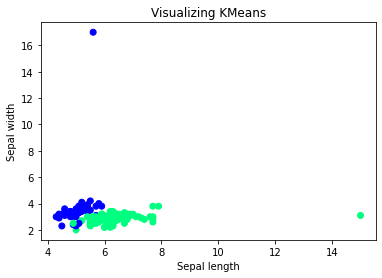

In [18]:
plt.figure(figsize=(6,4))
plt.title("Visualizing KMeans")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.scatter(dataset_KMeans.to_numpy()[:,0],dataset_KMeans.to_numpy()[:,1],cmap=plt.get_cmap("winter"), c=labels)
plt.show()

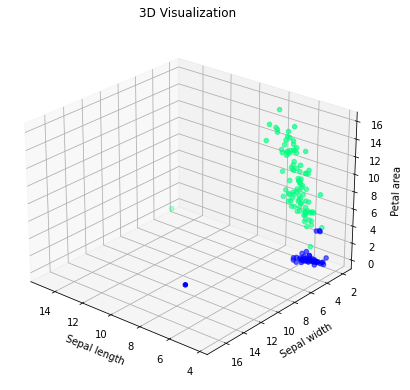

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1,figsize=(6,5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=25, azim=130)

plt.cla()
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal area")

ax.scatter(dataset_KMeans.to_numpy()[:,0], dataset_KMeans.to_numpy()[:,1], dataset_KMeans.to_numpy()[:,2]*dataset_KMeans.to_numpy()[:,3],\
           cmap=plt.get_cmap("winter"), c=labels)
plt.title("3D Visualization")
plt.show()

<h1> Decision Tree </h1>

<h2> Defining X (input) and Y (target) </h2>

<h3> X </h3>

In [20]:
X = dataset_KMeans.to_numpy()[:,0:4]
X[0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

<h3> Y </h3>

In [21]:
Y = dataset_KMeans.to_numpy()[:,4]
Y[0:10]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

<h2> Train/test split </h2>

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

<h2> Applying the Decision Tree </h2>

<h3> Fitting the model (training set) </h3>

In [23]:
DT_model = tree.DecisionTreeClassifier(random_state=0).fit(X_train,Y_train)

<h3> Predict the results </h3>

In [24]:
DT_classes = DT_model.predict(X)

<h3> Displaying the results </h3>

In [25]:
dataset_DT = dataset_KMeans
dataset_DT["DT_class"] = np.int16(DT_classes)
dataset_DT.head(10)

,sepal length,sepal width,petal length,petal width,Cluster_KMeans,DT_class
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,10.0,0.2,1,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


<h2> Model evaluation (test set) </h2>

In [26]:
DT_score = DT_model.score(X_test,Y_test)
print("The average accuracy is: ", round(DT_score*100,1), "%.")

The average accuracy is:  94.9 %.


<h2> Visualizing th decision tree : </h2>

In [27]:
print(f"Columns names: {dataset.columns.values[0:4]} \n(Class column excluded)")

Columns names: ['sepal length' 'sepal width' 'petal length' 'petal width'] 
(Class column excluded)


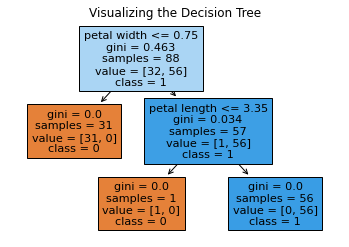

In [28]:
fig = plt.figure(figsize=(6,4))
ax = tree.plot_tree(DT_model,feature_names=dataset.columns.values[0:4], class_names=["0","1"], filled=True)
plt.title("Visualizing the Decision Tree")
plt.show()

<h1> End </h1>